# 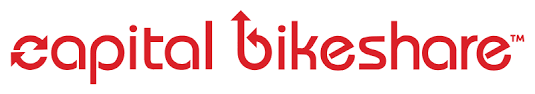

<h1><center>Capital Bikeshare | June 2020 - December 2022</center></h1>
<h2><center>By Emily Tran </center></h2>

<hr>
<font size="3.25">
<b>Overview:</b> Capital Bikeshare is a metro bikeshare service with 5000 bicycles, 600+ stations, across 7 jurisdictions in Washington DC. This analysis focuses on rides occuring from 2020-2022 and contains 8,317,845 total rides in the dataset.Capital Bikeshare offers its services by single-ride or full-day passes (casual) or annual subscriptions (member) and two bike options: classic or electric. Capital Bikeshare is seeking to increase numbers of membership signups by converting numbers of casual riders. Maximizing annual memberships is key to future growth of the company.
</br></br> 
</br>
<b>Objective:</b> To increase number of annual subscription member signups comparatively to previous years. </br> 
The analysis will explore:

- Customer type trends (members vs. casual) and preferences between bikes (electric vs. classic)
- Length durations and frequency of rides
- Investigate popular stations to allocate number of bikes
- Discover trends during peak season use to run future promotions
</br>
</br>
<b>Data Source:</b>
</br>
</br>
- Kaggle dataset: <a>https://www.kaggle.com/datasets/alexsocarras/dc-capital-bikeshare</a>
- Capital Bikeshare Zip: <a>https://s3.amazonaws.com/capitalbikeshare-data/index.html</a>
</font>
<hr>

# Import Libraries

In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import csv 
dc_bikeshare = pd.read_csv('bks_tripdata_v2.csv', low_memory=False)

# Data Cleaning

In [6]:
dc_bikeshare.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,77A0F1B26D1597B1,docked_bike,2020-04-25 17:28:39,2020-04-25 17:35:04,Rhode Island & Connecticut Ave NW,31239,12th & L St NW,31251.0,38.905996,-77.039802,38.903819,-77.028400,casual
1,8698F10128EA4F18,docked_bike,2020-04-06 07:54:59,2020-04-06 07:57:24,21st & I St NW,31205,18th & L St NW,31224.0,38.900711,-77.046449,38.903741,-77.042452,member
2,AA07819DC0F58872,docked_bike,2020-04-22 17:06:18,2020-04-22 18:08:32,Connecticut Ave & Tilden St NW,31313,Connecticut Ave & Tilden St NW,31313.0,38.941139,-77.061977,38.941139,-77.061977,casual
3,DA909BCA92EF85AB,docked_bike,2020-04-16 15:22:40,2020-04-16 15:58:37,7th & E St SW,31294,7th & E St SW,31294.0,38.883450,-77.021741,38.883450,-77.021741,casual
4,B36F1E14D8C6757E,docked_bike,2020-04-10 13:19:41,2020-04-10 13:23:05,Potomac & Pennsylvania Ave SE,31606,8th & Eye St SE / Barracks Row,31608.0,38.880300,-76.986200,38.879200,-76.995300,member


In [594]:
dc_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8317845 entries, 0 to 8317844
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_time          datetime64[ns]
 14  end_time            datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 951.9+ MB


In [9]:
#Checking for null values
dc_bikeshare.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    438795
start_station_id      438795
end_station_name      495885
end_station_id        495885
start_lat                 10
start_lng                 10
end_lat                17774
end_lng                17774
member_casual              0
dtype: int64

In [595]:
#Converting object column to datetime format
dc_bikeshare['start_time']=pd.to_datetime(dc_bikeshare['started_at'])
dc_bikeshare['end_time']=pd.to_datetime(dc_bikeshare['ended_at'])


In [596]:
#Drop Null Values
new_bikeshare = dc_bikeshare.dropna(subset=['start_station_name', 'end_station_name'])

In [597]:
#Filter Timeframe to only 2020-2022 
bike_time_filtered = new_bikeshare[(new_bikeshare['start_time'] >= "2020-01-01") & (new_bikeshare['start_time'] <= "2022-12-31")]

In [657]:
#Analyzing only usuable bikes: Electric and Classic
df = bike_time_filtered[bike_time_filtered['rideable_type'].isin(['electric_bike','classic_bike'])]
df['ride_duration_minutes'] = (bike_time_filtered['end_time'] - bike_time_filtered['start_time']).dt.total_seconds()/60

In [664]:
df['ride_duration']=df['end_time']-df['start_time']

In [665]:
#Subset the dataframe to exclude all records that are < 0 seconds 
df = df[df['ride_duration_minutes']>=0]

#Added new column to calculate ride duration in minutes
df['ride_duration_1']= (df['ride_duration']).dt.total_seconds()/60
df['start_time_hr']=pd.to_datetime(df['start_time']).dt.time

In [666]:
#Final Dataset
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_duration_minutes,ride_duration,ride_duration_1,start_time_hr
255646,FB2378E69EC62406,electric_bike,2020-06-17 16:14:39,2020-06-17 16:17:03,Carroll & Westmoreland Ave,32025.0,Takoma Metro,31408.0,38.974939,-77.011284,38.975203,-77.016858,member,2020-06-17 16:14:39,2020-06-17 16:17:03,2.400000,0 days 00:02:24,2.400000,16:14:39
322187,46629BB8E5555F79,electric_bike,2020-06-17 14:44:23,2020-06-17 14:46:44,3rd & Underwood St NW,31413.0,3rd & Underwood St NW,31413.0,38.968879,-77.016261,38.968878,-77.016276,member,2020-06-17 14:44:23,2020-06-17 14:46:44,2.350000,0 days 00:02:21,2.350000,14:44:23
322188,A427752D60D0E2C8,electric_bike,2020-06-17 14:42:06,2020-06-17 14:42:13,3rd & Underwood St NW,31413.0,3rd & Underwood St NW,31413.0,38.968865,-77.016278,38.968874,-77.016271,member,2020-06-17 14:42:06,2020-06-17 14:42:13,0.116667,0 days 00:00:07,0.116667,14:42:06
438572,6694BCE0612D1823,electric_bike,2020-07-16 08:44:44,2020-07-16 09:08:49,Philadelphia & Maple Ave,32010.0,East West Hwy & Blair Mill Rd,32019.0,38.981202,-77.011275,38.990422,-77.029423,member,2020-07-16 08:44:44,2020-07-16 09:08:49,24.083333,0 days 00:24:05,24.083333,08:44:44
438577,D057260F58EA4A44,electric_bike,2020-07-17 20:06:32,2020-07-17 20:26:42,Crystal Dr & 15th St S,31003.0,11th & M St NW,31266.0,38.860132,-77.049541,38.905460,-77.027346,casual,2020-07-17 20:06:32,2020-07-17 20:26:42,20.166667,0 days 00:20:10,20.166667,20:06:32


# Descriptive Analytics

In [615]:
df['member_casual'].value_counts()

member    3496470
casual    1951459
Name: member_casual, dtype: int64

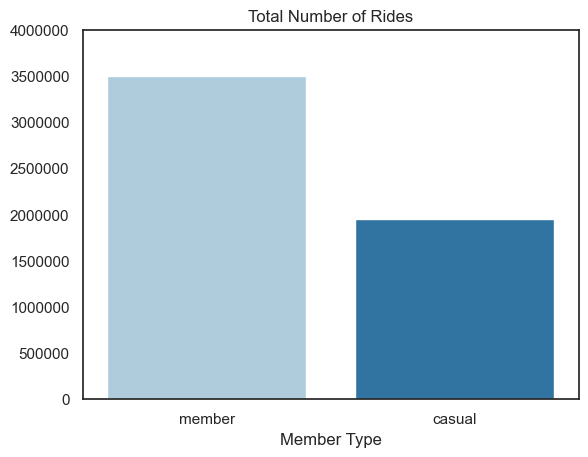

In [613]:
#Number of Casual vs Member Riders

custom_palette = sns.set_palette('Paired', 10)
ax = sns.countplot(x='member_casual', data=df).set(title="Total Number of Rides", ylabel=None, xlabel="Member Type")
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))

plt.show()

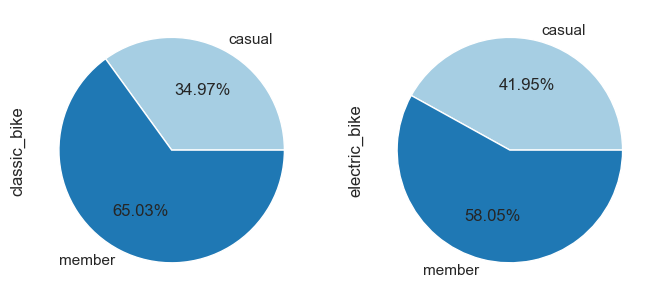

In [502]:
#Proportion of classic vs electric bike riders
axes=pd.crosstab(df['member_casual'], df['rideable_type']).plot.pie(subplots=True,figsize=(8,5), autopct="%2.2f%%", legend=False)


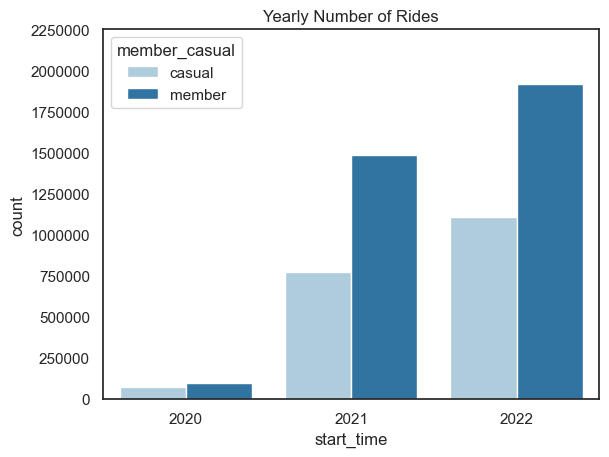

In [476]:
ax1 = sns.countplot(x=df['start_time'].dt.year, hue=bike_time_filtered['member_casual']).set(title="Yearly Number of Rides")

plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.show()

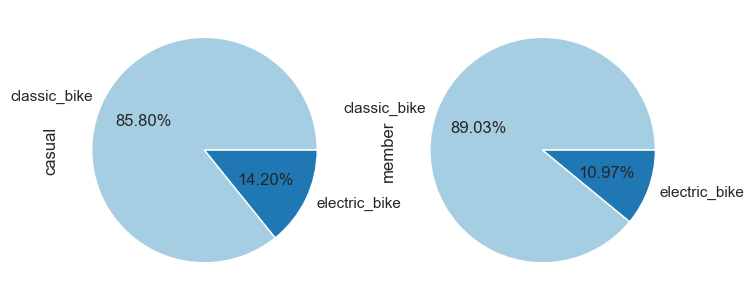

In [669]:
#Proportion of casual vs members
axes=pd.crosstab(df['rideable_type'], df['member_casual']).plot.pie(subplots=True,figsize=(8,5), autopct="%2.2f%%", legend=False)

<font size="3.5"><b>Insights:</b></font> 
- Total of 3,496,470 members and 1,951,459 casual riders taken from 2020-2022 making member riders the majority.
- Classic bikes are the preferred type of rides in the analysis.
- Total number of rides have increased from 2022 to 2023 by approximately (75%).


## Customer Type Trends


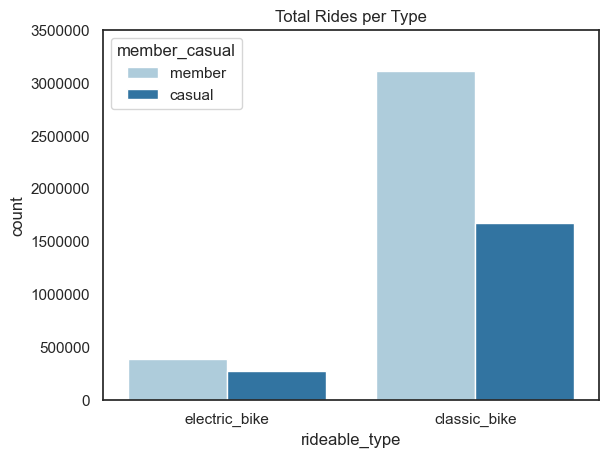

In [478]:
countplot = sns.countplot(x='rideable_type', data=df, hue='member_casual')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
countplot.set(title="Total Rides per Type")
countplot.set_xlabel = ("Rideable Type")
plt.show()

<font size="3.5"><b>Insights:</b></font> 
- Overall, classic bikes are more favorable type than electric bike.
- 2x amount of members use classic bikes over casual riders; members prefer classic bikes.
- Electric bikes account for only 18% of total rides. Recommend looking into number of electric bikes available in the city which might affect sales.


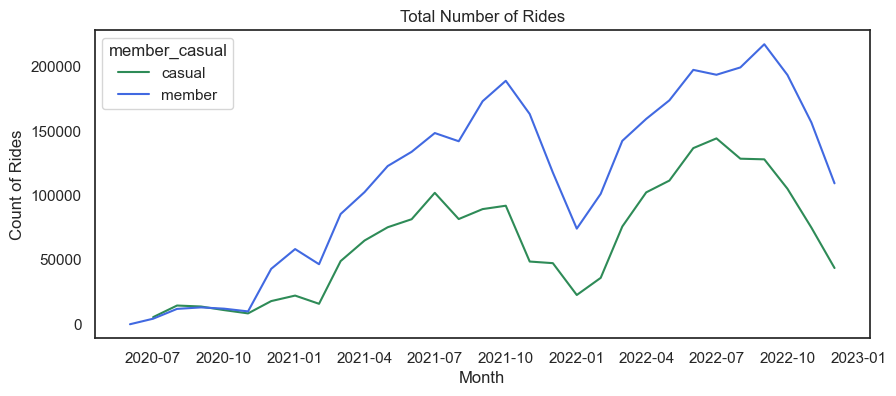

In [531]:
#Total number of rides throughout 2020-2022
rides_per_month = (df[["start_time", "member_casual"]]
                   .groupby("member_casual")
                   .resample('1MS', on="start_time")
                   .count().get("member_casual").rename("num_rides").reset_index())
plt.figure(figsize=(10,4))
sns.set_theme(style="white")
ax = sns.lineplot(data=rides_per_month, x="start_time", y="num_rides", hue="member_casual", palette=['seagreen', 'royalblue'])
ax.set_xlabel("Month")
ax.set_ylabel("Count of Rides")
ax.set_title("Total Number of Rides")
plt.show()

<font size="3.5"><b>Insights:</b></font> 
- Customers are more inclined to ride during summer to fall seasons as the highest peak occured in the same time period for both years.
- Peak usage of rides are similiar for casual and member riders as the pattern remains consistent between two factors.
- Enticing casual riders to sign up for trial memberships in peak seasons to experience benefits.

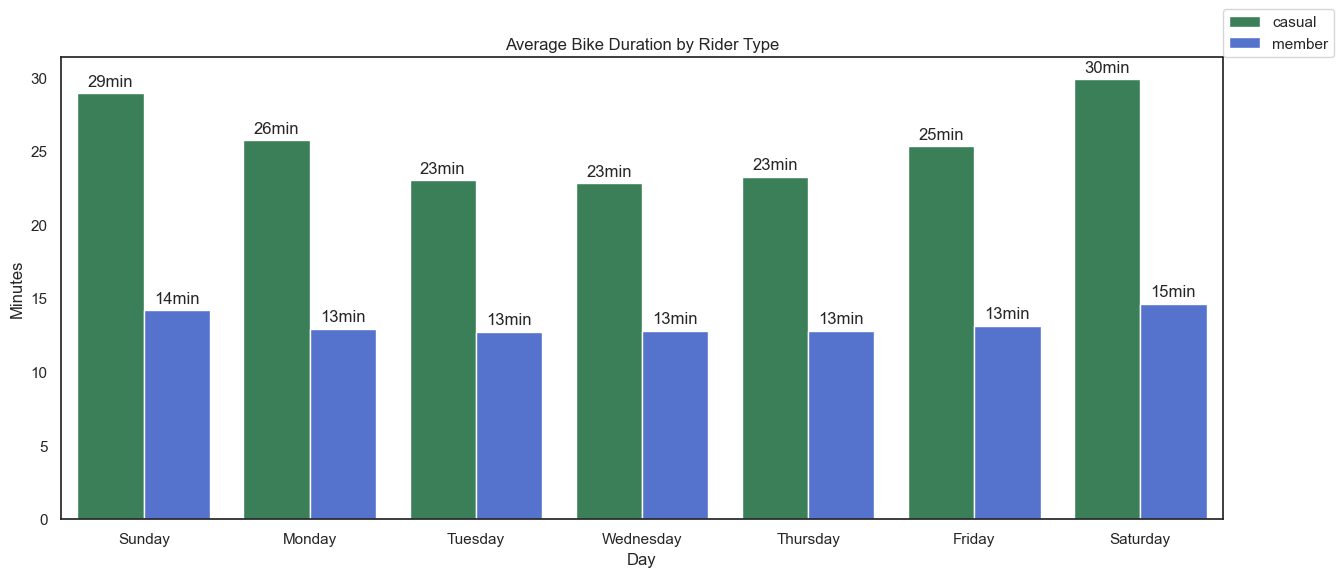

In [540]:
daily_avg_duration = df['ride_duration_1'].groupby([df['member_casual'], df['start_time'].dt.day_name()]).mean().rename('duration_in_mins').reset_index()
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.figure(figsize=(15,6))
ax= sns.barplot(data=daily_avg_duration, x='start_time', y='duration_in_mins', hue='member_casual', palette=['seagreen', 'royalblue'], order=day_order)
ax.set_title("Average Bike Duration by Rider Type")
ax.set_ylabel("Minutes")
ax.set_xlabel("Day")
ax.legend(loc=(1,1))

for bars in ax.containers:
    ax.bar_label(bars, [f"{x:.0f}min" for x in bars.datavalues], padding=3)

<font size="3.5"><b>Insights:</b></font> 
- Ride times fluctuate more with casual riders compared to member riders. This may be due to many casual riders are tourists comparatively members are commuters to the local area.
- Casual user ride duration is on average 52% longer than member user ride duration. Casual riders may be riding for leisure as ride duration is longer on weekends.
- Recommend increase number of bikes on the weekend as longer ride durations = less number of new rides.

## Bike Distribution

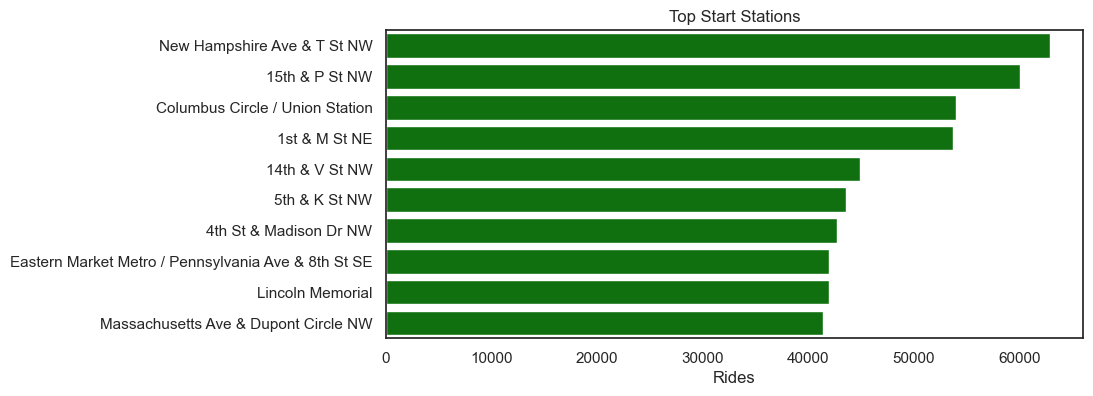

In [576]:
#Popular start and end stations by count (between member and casuals)
start_station_graph = pd.DataFrame(df['start_station_name'].value_counts().head(10)).reset_index()

plt.figure(figsize=(9,4))
ax = sns.barplot(y='index', x='start_station_name', data=start_station_graph, color='Green').set(title="Top Start Stations", xlabel="Rides", ylabel=None)
plt.show()

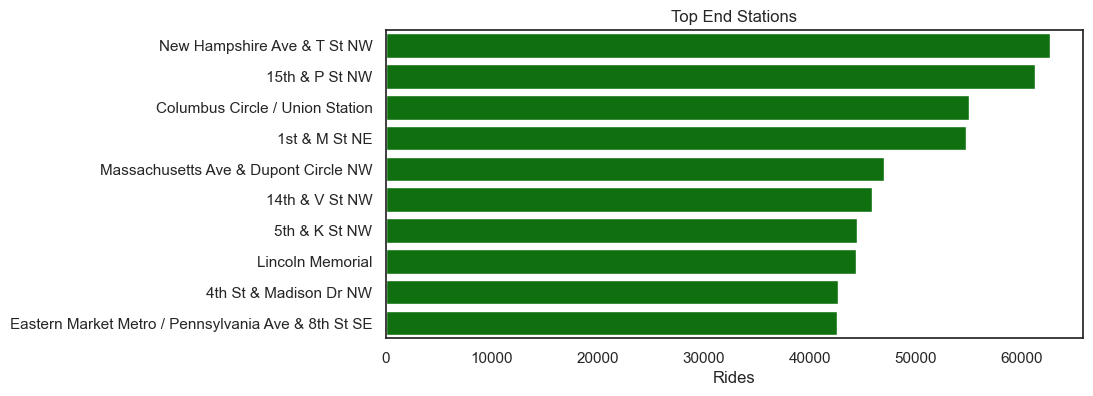

In [575]:
end_station_graph = pd.DataFrame(df['end_station_name'].value_counts().head(10)).reset_index()
plt.subplots(figsize=(9,4))
sns.barplot(y='index', x='end_station_name', data=end_station_graph, color='Green').set(title="Top End Stations", ylabel=None, xlabel="Rides")
plt.show()

<font size="3.5"><b>Insights:</b></font> 
- <i>New Hampshire Ave & T St NW, 15th & P St NW, and Columbus Circle</i> is the most frequented start and end stations. 
- More riders end their ride at <i>Massachusetts Ave & Dupont Curcle NW</i> than the starting station.
- Increase bicycle units by 10% at top 3 stations because of their high traffic usage. It is best to reach a high number of riders as they may sign up for potential memberships.

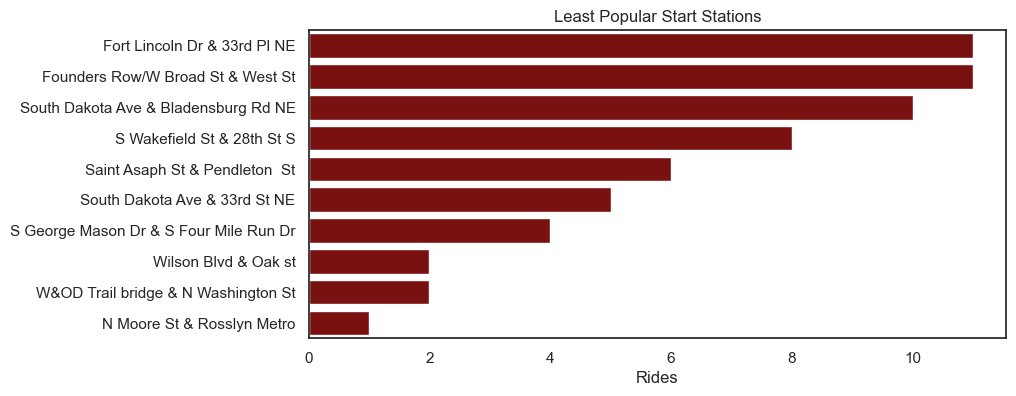

In [577]:
#Least popular start stations
tail_start_station = pd.DataFrame(df['start_station_name'].value_counts().tail(10)).reset_index()
plt.subplots(figsize=(9,4))
sns.barplot(y='index', x='start_station_name', data=tail_start_station, color='darkred').set(title="Least Popular Start Stations", ylabel=None, xlabel="Rides")
plt.show()

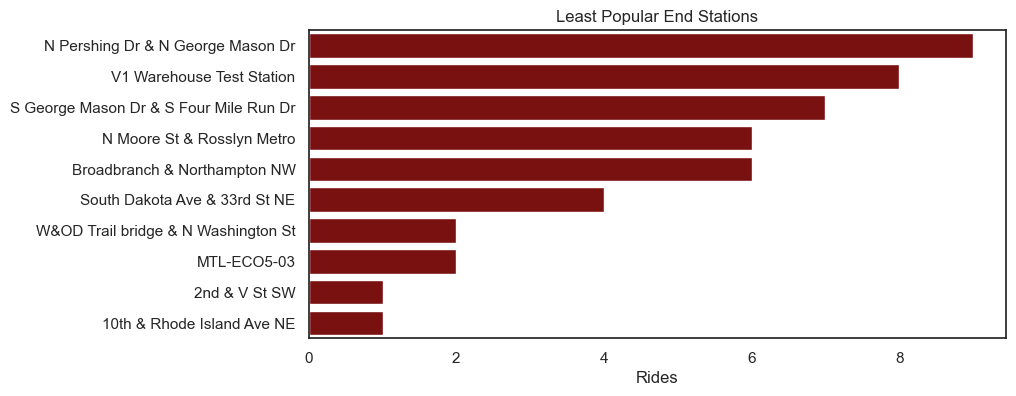

In [578]:
#Least popular end stations
tail_end_station = pd.DataFrame(bike_time_filtered['end_station_name'].value_counts().tail(10)).reset_index()
plt.subplots(figsize=(9,4))
sns.barplot(y='index', x='end_station_name', data=tail_end_station, color='darkred').set(title="Least Popular End Stations", ylabel=None, xlabel="Rides")
plt.show()

<font size="3.5"><b>Insights:</b></font> 
- Consider reducing number of bicycle units at low count stations in order to allocate sources to higher traffic stations.
- <i>South Dakota Ave & 33rd St NE</i> appear to be lowest start and end stations - recommend to terminate station.

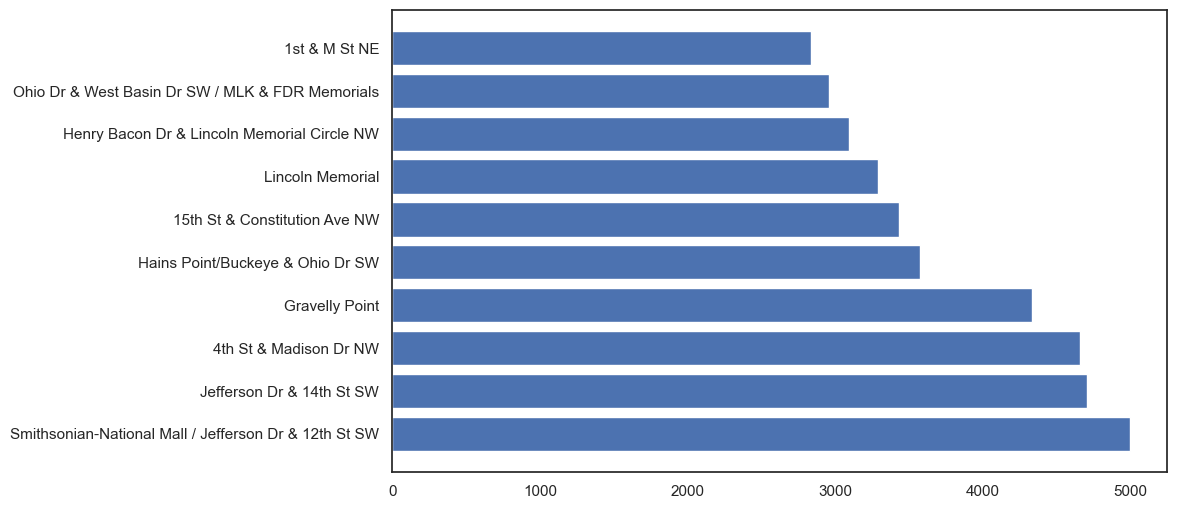

In [592]:
#Stations with most Round Trips
df3 = pd.DataFrame(df.groupby(['start_station_name', 'end_station_name']).size())
df4=df3.reset_index()
boolean = df4['start_station_name'] == df4['end_station_name']
subset_df = df4[boolean]
subset_df.columns = ['start_station','end_station','count']
final_df = subset_df.sort_values(by=['count'], ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(final_df['start_station'], final_df['count'])
plt.title=('Round Trip')
plt.show()


In [429]:
start_station_graph 

top10_start_stations = df[df['start_station_name'].isin(list(start_station_graph['index']))]
df_ss= top10_start_stations.groupby(['start_station_name','rideable_type']).count()['ride_id']
pd.DataFrame(df_ss)
df_ss3 = df_ss.reset_index()
df_ss3

,start_station_name,rideable_type,ride_id
0,14th & V St NW,classic_bike,39883
1,14th & V St NW,electric_bike,5075
2,15th & P St NW,classic_bike,53967
3,15th & P St NW,electric_bike,6141
4,1st & M St NE,classic_bike,47246
5,1st & M St NE,electric_bike,6464
6,4th St & Madison Dr NW,classic_bike,40543
7,4th St & Madison Dr NW,electric_bike,2226
8,5th & K St NW,classic_bike,39306
9,5th & K St NW,electric_bike,4310


In [434]:
df_ss

start_station_name                                   rideable_type
14th & V St NW                                       classic_bike     39883
                                                     electric_bike     5075
15th & P St NW                                       classic_bike     53967
                                                     electric_bike     6141
1st & M St NE                                        classic_bike     47246
                                                     electric_bike     6464
4th St & Madison Dr NW                               classic_bike     40543
                                                     electric_bike     2226
5th & K St NW                                        classic_bike     39306
                                                     electric_bike     4310
Columbus Circle / Union Station                      classic_bike     49083
                                                     electric_bike     4911
Eastern Market Metro 

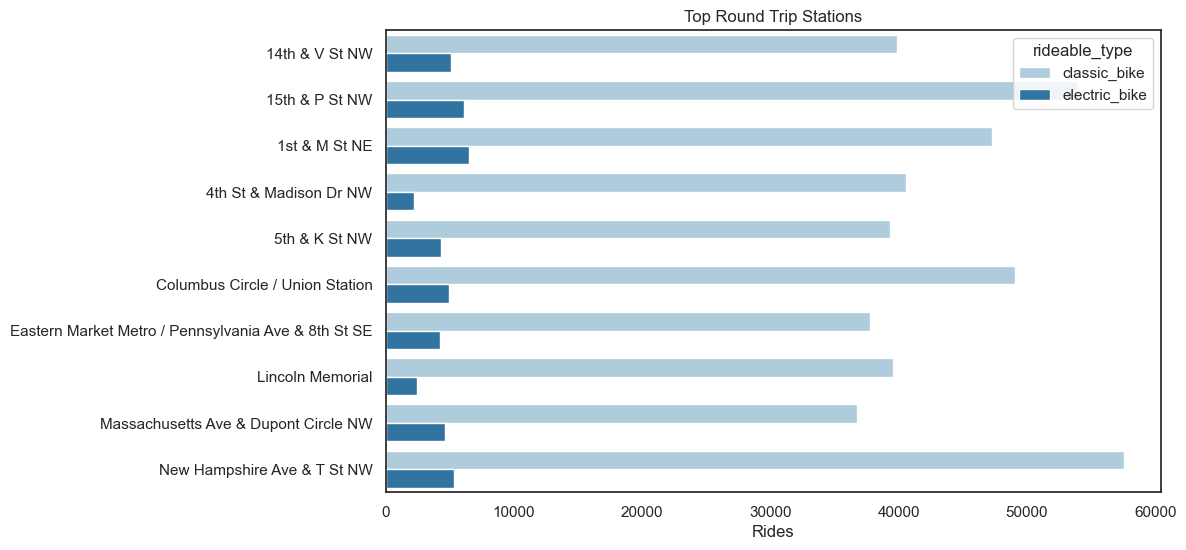

In [653]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=df_ss3['start_station_name'], x='ride_id', hue='rideable_type', data=df_ss3).set(title="Top Round Trip Stations", xlabel="Rides", ylabel=None)
plt.show()

<font size="3.5"><b>Insights:</b></font> 
- Electric bikes is the most popular at <i>1st & M St NE</i> and classic bikes has the nmost rides at <i>New Hampshire Ave & T St NW</i>.
- <i>Lincoln Memorial</i> has the lowest electric to classic bike ratio: 5:100; patrons prefer to choose classic bikes at this station more comparatively to others.
- Top round trip stations have original bikes returned to the station more frequently. Number of maximum bikes may be lowered by 10% to allocate units to other top stations.

## Trial Memberships During Peak Times


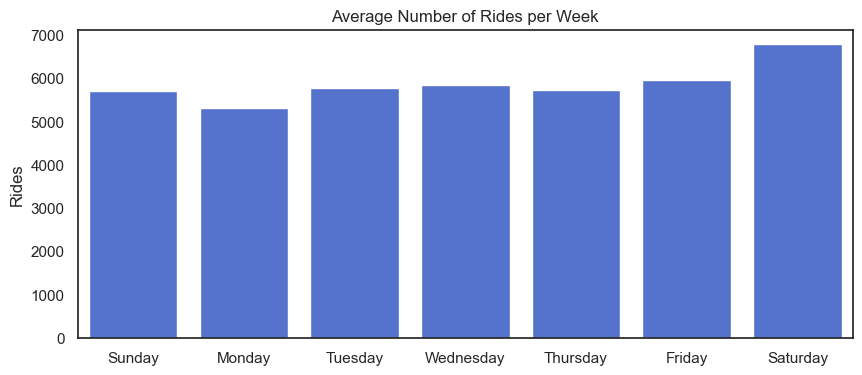

In [574]:
#Average Number of Rides per Week

average_per_day = count_per_day.groupby(count_per_day.index.day_name()).mean()
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(10,4))
ax = sns.barplot(data=average_per_day, x=average_per_day.index, y="ride_id", color='royalblue', order=day_order)
ax.set_title("Average Number of Rides per Week")
ax.set_xlabel(None)
ax.set_ylabel("Rides")

plt.show()

<font size="3.5"><b>Insights:</b></font> 
- Saturday is the busiest day of the week averaging 6,500 rides.  
- Monday is the slowest day of the week with 5,200 total rides.

In [668]:
#Duration of time between members & casuals during the week**
df_6=(df[['member_casual', 'rideable_type', 'ride_duration', 'start_time']]
      .groupby(['member_casual','rideable_type'])
      .resample('1d', on='start_time')
      .mean())
df_6['ride_duration']= (df_6['ride_duration']).dt.total_seconds()/60
df_duration= df_6.groupby(df_6.index.get_level_values('start_time').day_name()).mean()
df_duration_wk= df_6.groupby([df_6.index.get_level_values('start_time').day_name(), 'member_casual']).mean()
df_duration_wk

ride_duration
start_time member_casual               
Friday     casual             21.786462
           member             13.885400
Monday     casual             21.382853
           member             13.638677
Saturday   casual             25.431618
           member             15.238071
Sunday     casual             24.559402
           member             14.872848
Thursday   casual             20.445405
           member             13.494205
Tuesday    casual             20.283258
           member             13.528235
Wednesday  casual             20.340607
           member             13.441137

In [368]:
df_duration_ride= df_6.groupby([df_6.index.get_level_values('start_time').day_name(), 'rideable_type']).mean()
df_duration_ride

ride_duration
start_time rideable_type               
Friday     classic_bike       18.721097
           electric_bike      17.100562
Monday     classic_bike       18.456057
           electric_bike      16.726685
Saturday   classic_bike       21.666457
           electric_bike      19.230330
Sunday     classic_bike       20.800662
           electric_bike      18.816548
Thursday   classic_bike       17.791367
           electric_bike      16.287277
Tuesday    classic_bike       17.603305
           electric_bike      16.321744
Wednesday  classic_bike       17.632933
           electric_bike      16.263535

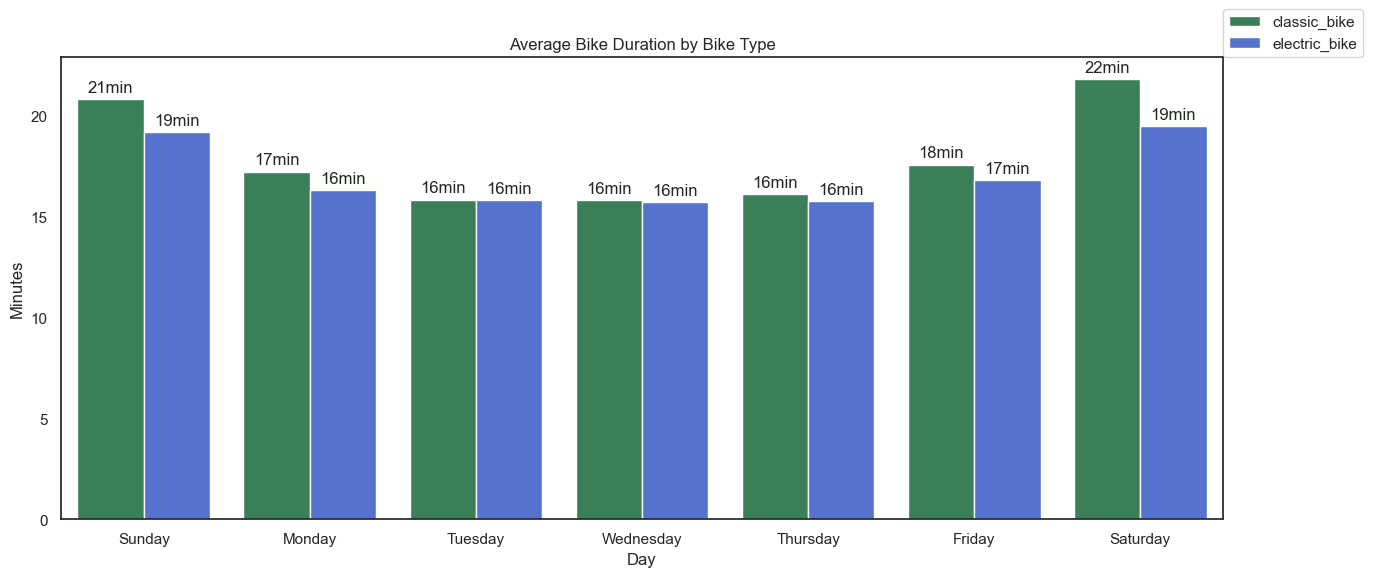

In [541]:
daily_avg_duration = df['ride_duration_1'].groupby([df['rideable_type'], df['start_time'].dt.day_name()]).mean().rename('duration_in_mins').reset_index()
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.figure(figsize=(15,6))
ax= sns.barplot(data=daily_avg_duration, x='start_time', y='duration_in_mins', hue='rideable_type', palette=['seagreen', 'royalblue'], order=day_order)
ax.set_title("Average Bike Duration by Bike Type")
ax.set_ylabel("Minutes")
ax.set_xlabel("Day")
ax.legend(loc=(1,1))

for bars in ax.containers:
    ax.bar_label(bars, [f"{x:.0f}min" for x in bars.datavalues], padding=3)

<font size="3.5"><b>Insights:</b></font> 
- Average duration of classic bikes are longer on the weekends.
- The difference in duration between bikes on the weekdays are -/+ 1 minute.


In [295]:
count_per_day = df[["start_time", "ride_id"]].resample('1d', on='start_time').count()
count_per_day

,ride_id
start_time,
2020-06-17,3
2020-06-18,0
2020-06-19,0
2020-06-20,0
2020-06-21,0
...,...
2022-12-26,1526
2022-12-27,3023
2022-12-28,3845


In [545]:
def hr_func(ts):
    return ts.hour
df['s_time_hr']=df['start_time'].apply(hr_func)

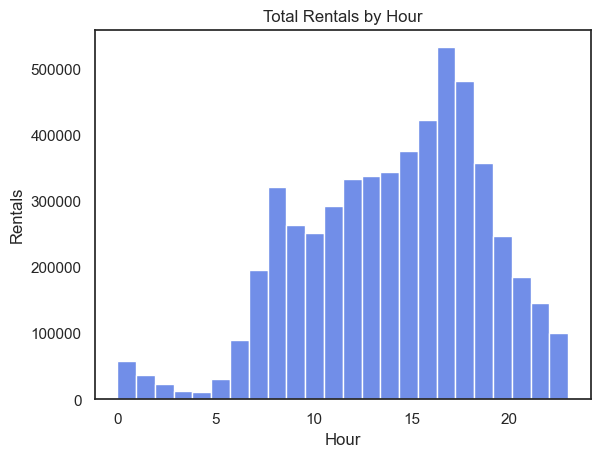

In [562]:
#Peak Rental time is between 2pm-5pm, and spike at 8am
sns.histplot(df['s_time_hr'], bins=24,  color='royalblue').set(title="Total Rentals by Hour", xlabel="Hour", ylabel="Rentals") 

plt.show()

<font size="3.5"><b>Insights:</b></font> 
- 2-5pm counts for the highest amount of rides during this time range. Correlates to when users may end their work day and commute with bikes.
- Recommend allocating bikes to top start stations during 2-5pm to supply highest number of rides.
- 2-5am counts for the lowest amount of rides during this time range, correlating to when most buisness are closed.

# Conclusion


- Recommend looking into increasing the number of electric bikes available in the city which might boost rides.
- Customers are more inclined to ride during summer to fall seasons as the highest peak of tourist season. Designing customer seasonal packages that give casual riders an experience of membership benefits might entice higher membership signups.
- Increasing bicycle units by 10% at top stations related to their high traffic ride count. Consider adding bikes at <b><i>New Hampshire Ave & T St NW, 15th & P St NW, and Columbus Circle;</b></i> as they are the top 3 stations in the district. Consider terminating lowest traffic bike stations <b><i>South Dakota Ave & 33rd St NE</b></i> to allocate bikes to other areas.
- Saturday at around 2-5pm is expected to be the busiest day and time period for riders. To accomodate high number of rides, it is suggested to increase bike supply during these times at heavily traffic areas. 2-5pm correlates to commutes for local riders therefore more bikes should be added near buisness building stations.
  
